In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore') 


In [2]:
pima = pd.read_csv('/Users/sunilverma/Downloads/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
round((pima.isnull().sum()/len(pima)*100).sort_values(ascending = False),2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

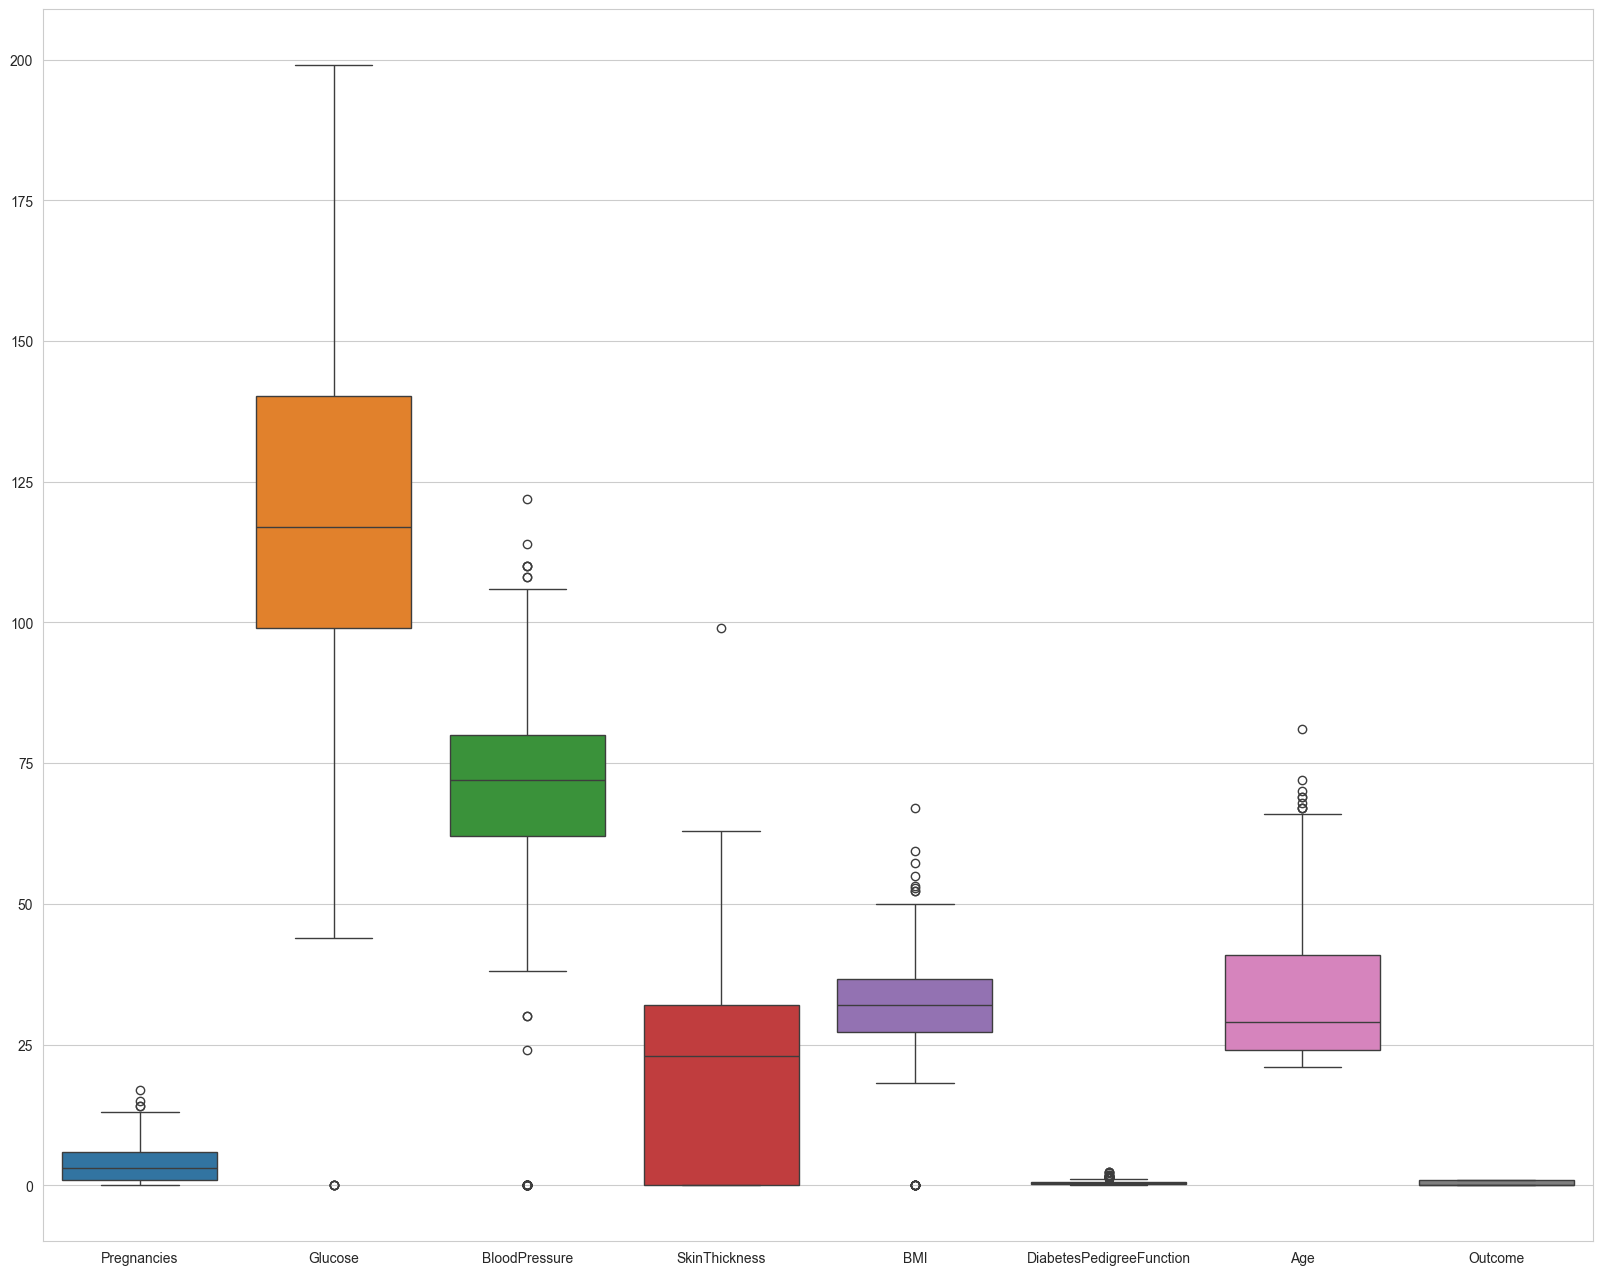

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,16)) 
sns.boxplot(data = pima[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']])
plt.show()

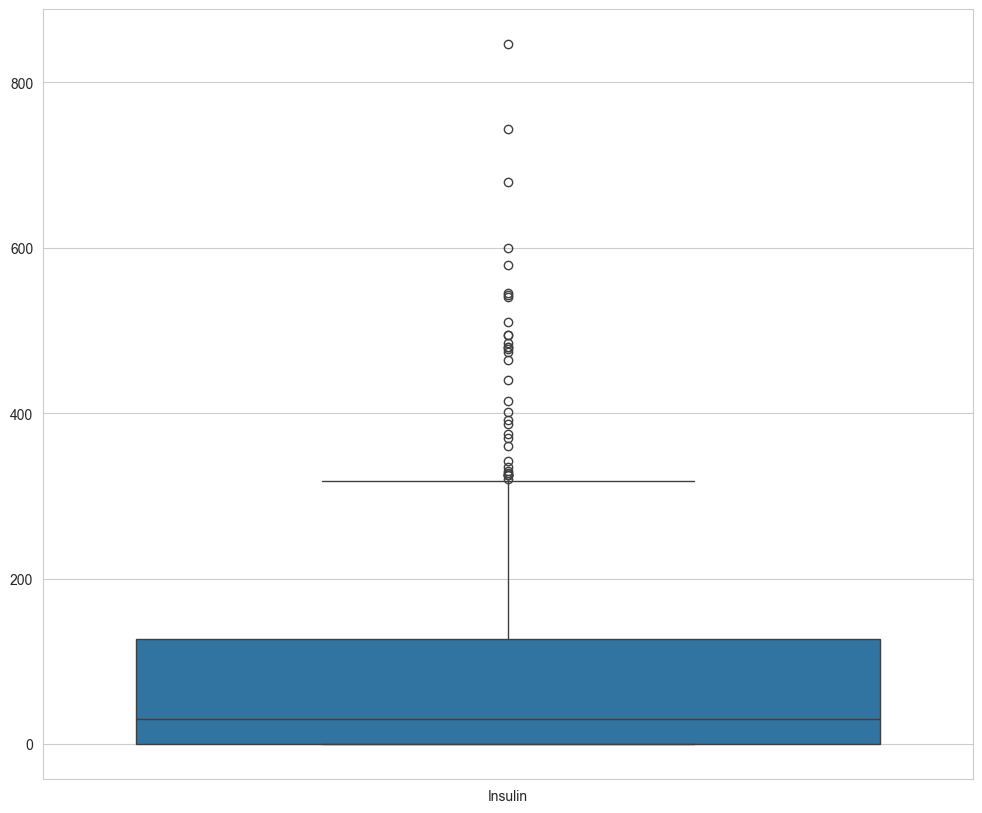

In [7]:
plt.figure(figsize = (12,10)) 
sns.boxplot(data = pima[['Insulin']])
plt.show()

<Figure size 2400x1900 with 0 Axes>

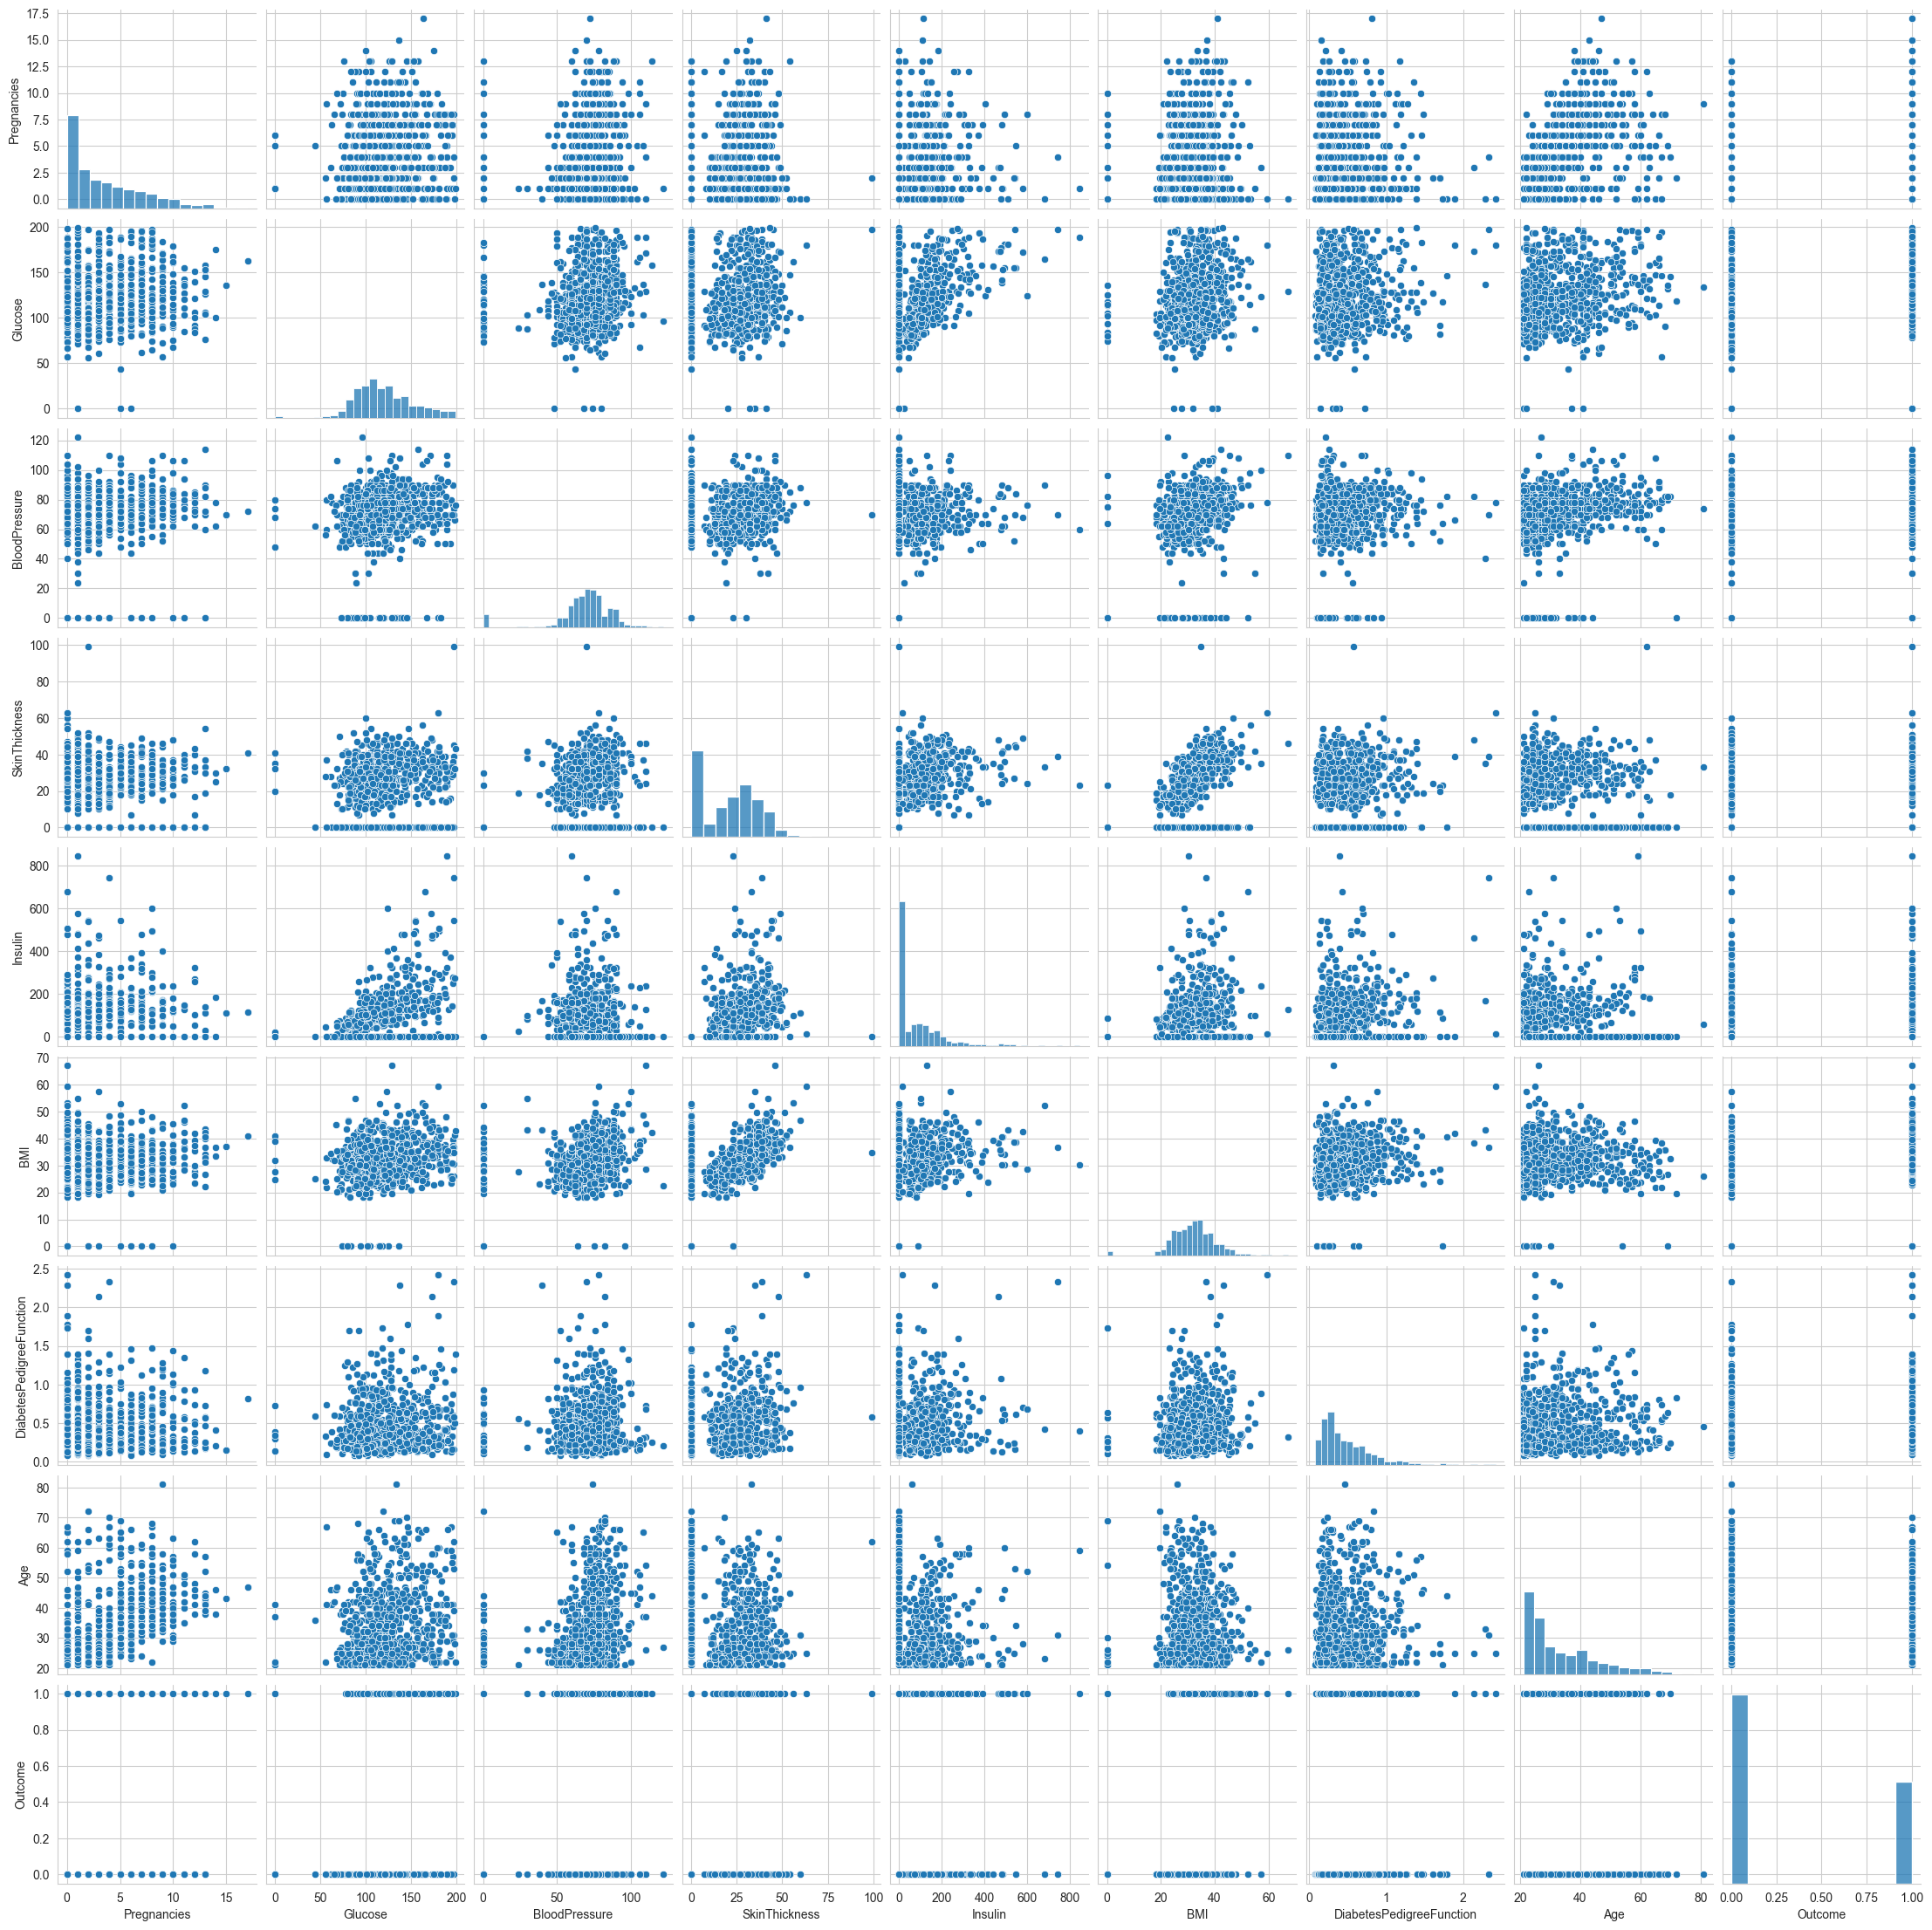

In [8]:
plt.figure(figsize = (24,19))
sns.pairplot(data = pima) 
plt.show()

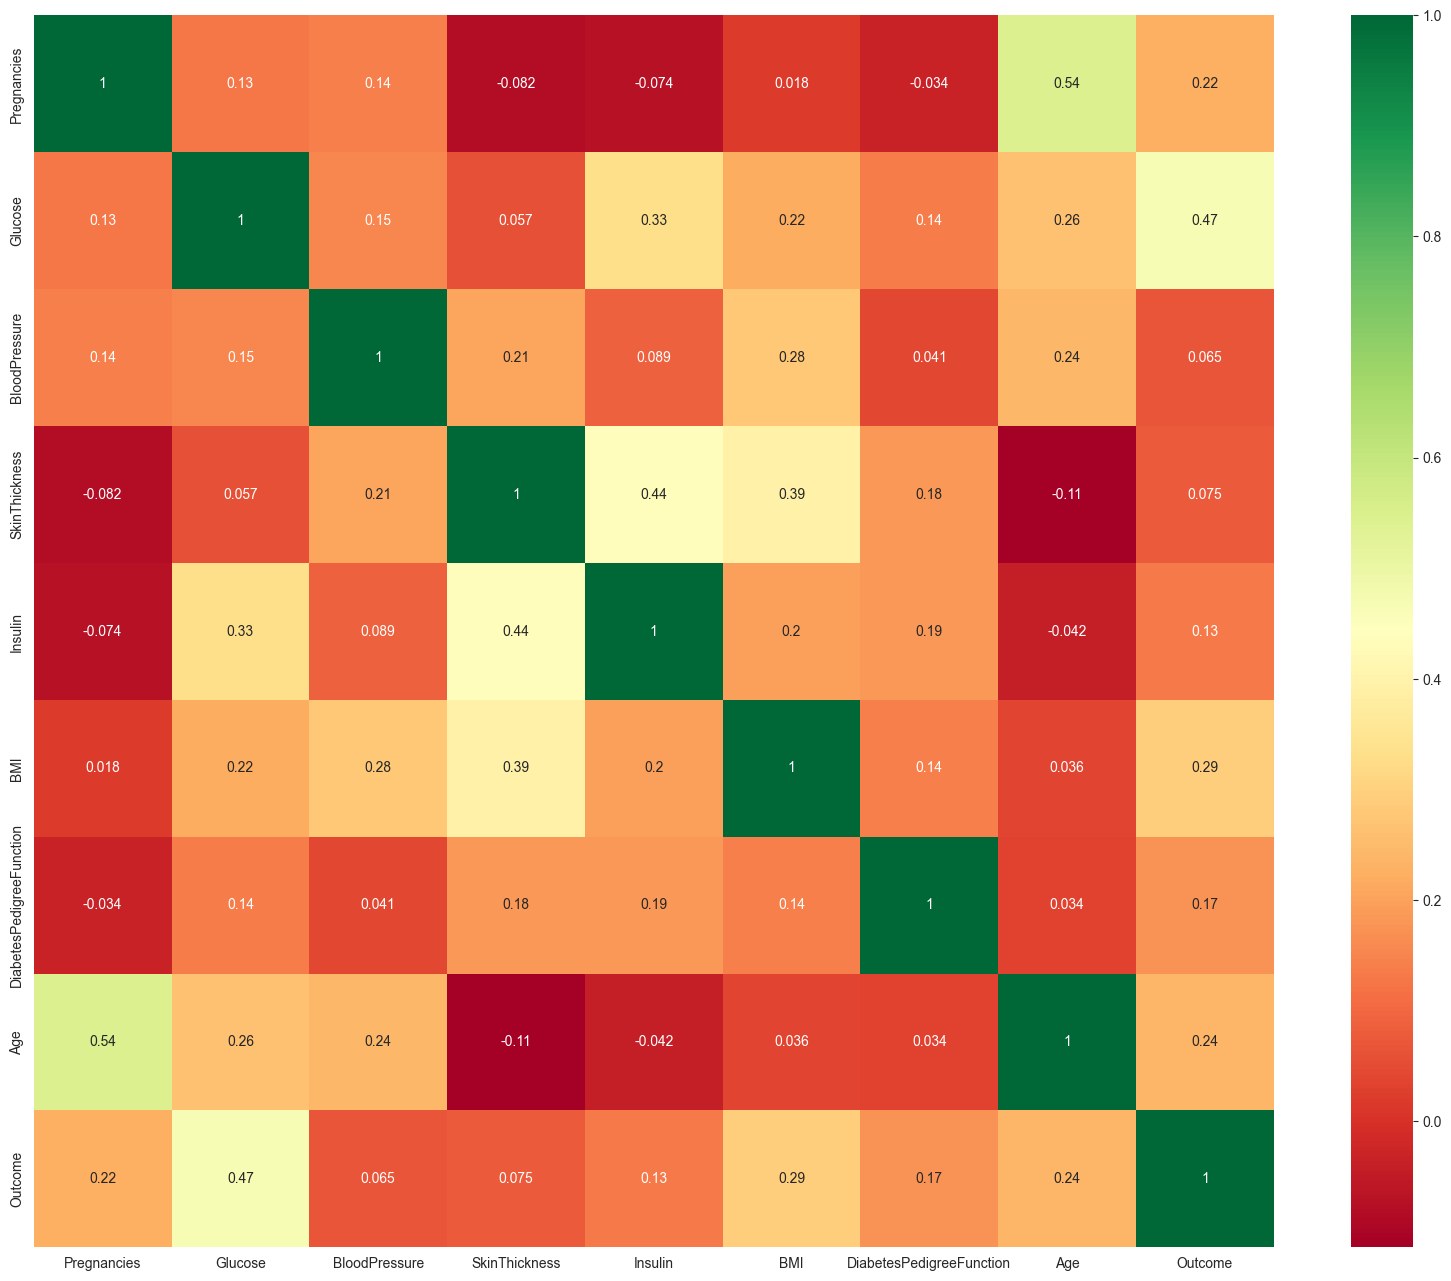

In [9]:
plt.figure(figsize = (20,16)) 
sns.heatmap(data = pima.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

In [10]:
#split the data into train test and applying the Decision tree
X = pima.drop(columns = 'Outcome') 
y = pima['Outcome']


In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
#splitting the data in train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 40) 
print(f'X_train Shape, {X_train.shape}, X_test Shape:, {X_train.shape}')
print(f'y_train Shape, {y_train.shape}, y_test Shape:, {y_test.shape}')

X_train Shape, (537, 8), X_test Shape:, (537, 8)
y_train Shape, (537,), y_test Shape:, (231,)


In [14]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = clf.predict(X_test) 


In [16]:
accuracy = accuracy_score(y_test,y_pred) 
print(f'Accuracy Score: {accuracy: .2f}')

Accuracy Score:  0.71


In [17]:
! pip install pydotplus

In [18]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'BMI', 'DiabetesPedigreeFunction', 'Age']


In [19]:
feature_cols = X.columns.tolist()  # assuming X is your feature DataFrame


In [20]:
! pip install graphviz

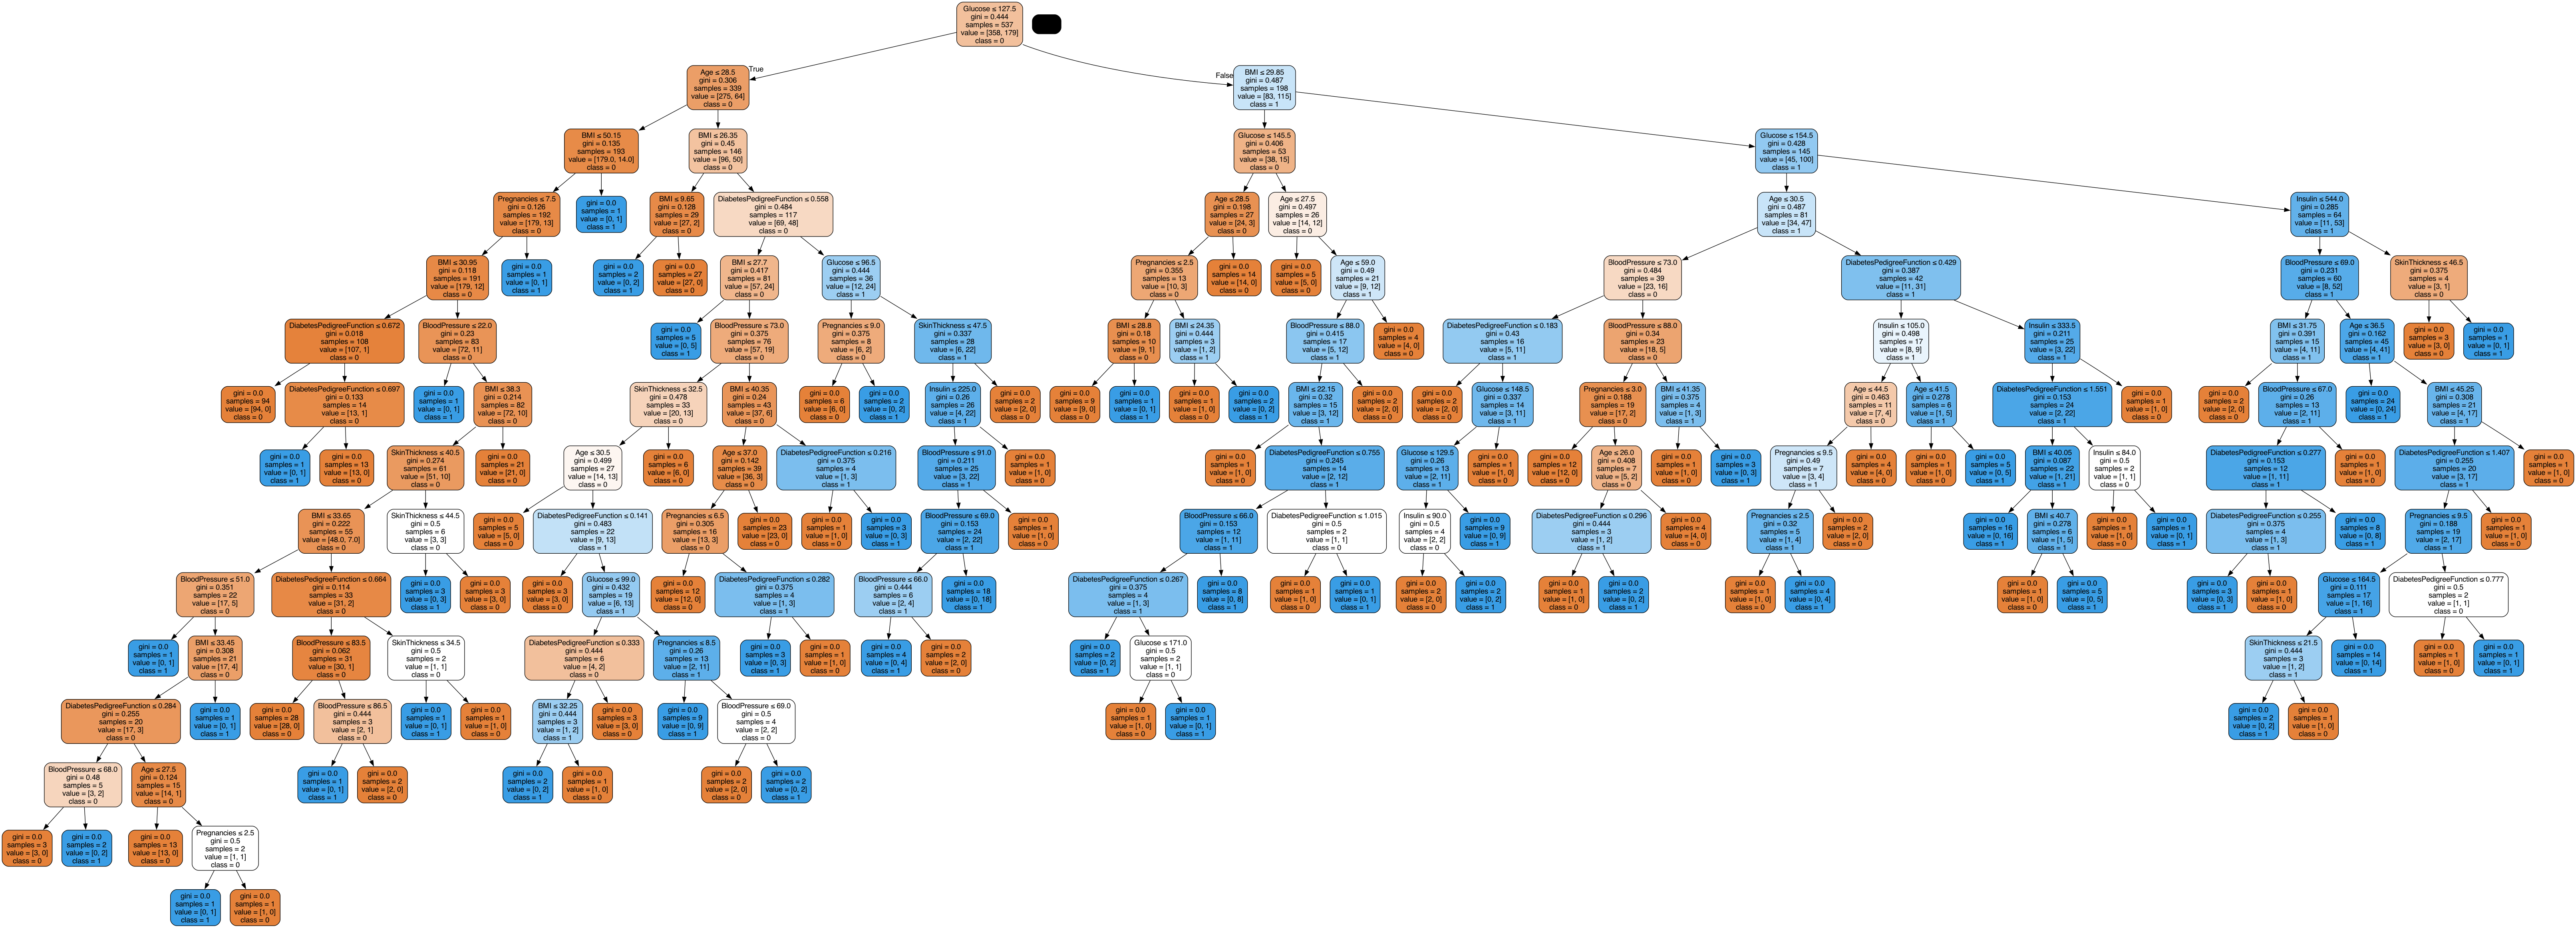

In [21]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,  # Make sure this is defined
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())



In [ ]:
#create decision tree classifier object 

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test,y_pred) 
print(f'Accuracy Score: {accuracy: .2f}')



Accuracy Score:  0.77


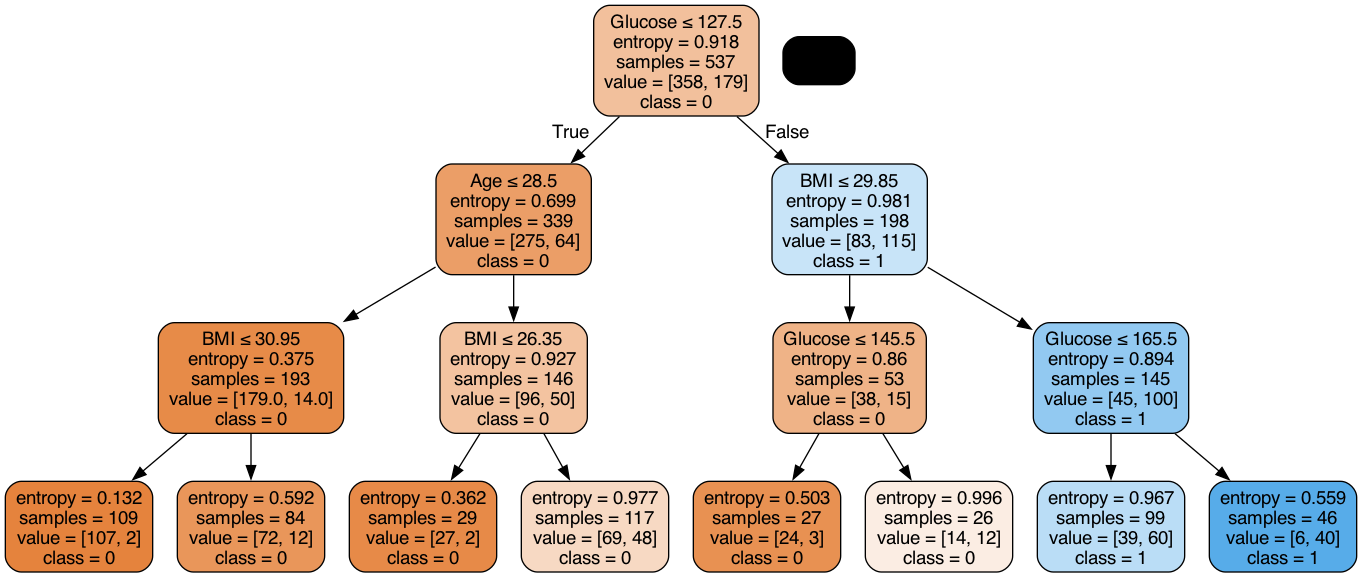

In [25]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())



### As you can see, this pruned model is less complex, more explainable, and easier to understand than the previous decision tree model plot.